In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
LIOEKF_os1_cloud_node1_imu = np.loadtxt('../../../dataset/rosbag/ntu_viral/spms_03/lio_ekf_01.txt', usecols=(1,2,3), unpack=True)
LIOEKF_IN_PIN_os1_cloud_node1_imu = np.loadtxt('../../../dataset/rosbag/ntu_viral/spms_03/pin_lio_ekf_odo_os1_cloud_node1.txt', usecols=(1,2,3), skiprows=65, unpack=True)
LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess = np.loadtxt('../../../dataset/rosbag/ntu_viral/spms_03/pin_lio_ekf_odo_newIMUProcess.txt', 
                                      usecols=(1,2,3), skiprows=65, unpack=True)
LIOEKF_IN_PIN_os1_cloud_node1_imu_update = np.loadtxt('../../../dataset/rosbag/ntu_viral/spms_03/pin_lio_ekf_odo_update.txt', 
                                      usecols=(1,2,3), skiprows=65, unpack=True)
pin_odom = np.loadtxt('../../../dataset/rosbag/ntu_viral/spms_03/odom_poses_kitti.txt', delimiter=' ', usecols=(3, 7, 11), unpack=True)
pin_slam = np.loadtxt('../../../dataset/rosbag/ntu_viral/spms_03/slam_poses_kitti.txt', delimiter=' ', usecols=(3, 7, 11), unpack=True)

In [3]:
trans = np.array([[ 1,  0,  0],
                  [ 0,  1,  0],
                  [ 0,  0, -1]])

LIOEKF_os1_cloud_node1_imu = trans @ LIOEKF_os1_cloud_node1_imu
LIOEKF_IN_PIN_os1_cloud_node1_imu = trans @ LIOEKF_IN_PIN_os1_cloud_node1_imu
LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess = trans @ LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess
LIOEKF_IN_PIN_os1_cloud_node1_imu_update = trans @ LIOEKF_IN_PIN_os1_cloud_node1_imu_update

pin_odom = trans @ pin_odom
pin_slam = trans @ pin_slam

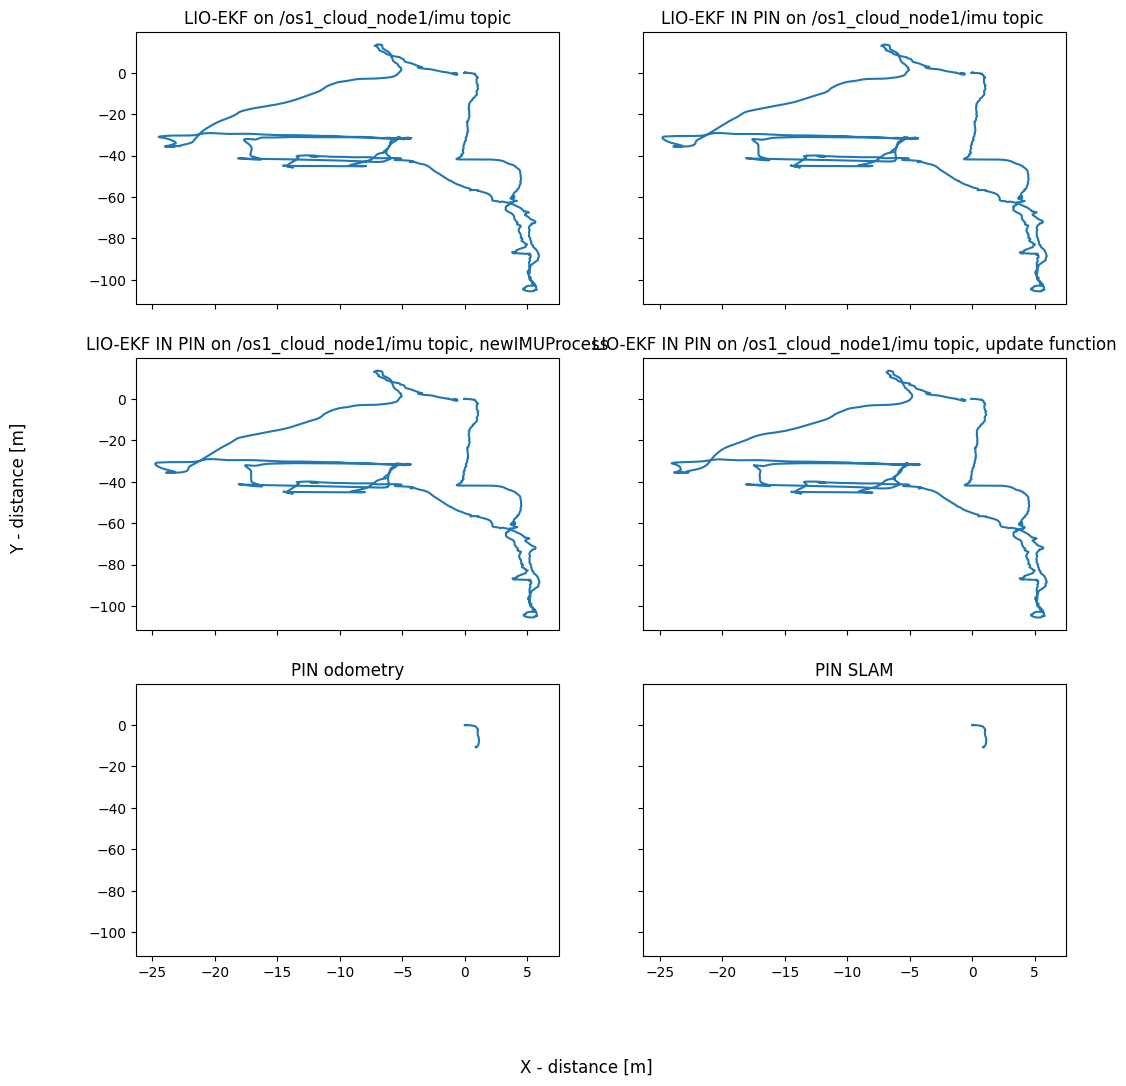

In [4]:
figure, axis = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(12, 12))

axis[0][0].plot(LIOEKF_os1_cloud_node1_imu[0], LIOEKF_os1_cloud_node1_imu[1])
axis[0][0].set_title("LIO-EKF on /os1_cloud_node1/imu topic")
axis[0][1].plot(LIOEKF_IN_PIN_os1_cloud_node1_imu[0], LIOEKF_IN_PIN_os1_cloud_node1_imu[1])
axis[0][1].set_title("LIO-EKF IN PIN on /os1_cloud_node1/imu topic ")
axis[1][0].plot(LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess[0], LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess[1])
axis[1][0].set_title("LIO-EKF IN PIN on /os1_cloud_node1/imu topic, newIMUProcess")
axis[1][1].plot(LIOEKF_IN_PIN_os1_cloud_node1_imu_update[0], LIOEKF_IN_PIN_os1_cloud_node1_imu_update[1])
axis[1][1].set_title("LIO-EKF IN PIN on /os1_cloud_node1/imu topic, update function")
axis[2][0].plot(pin_odom[0], pin_odom[1])
axis[2][0].set_title("PIN odometry")
axis[2][1].plot(pin_slam[0], pin_slam[1])
axis[2][1].set_title("PIN SLAM")

figure.supxlabel('X - distance [m]')
figure.supylabel('Y - distance [m]')
plt.show()

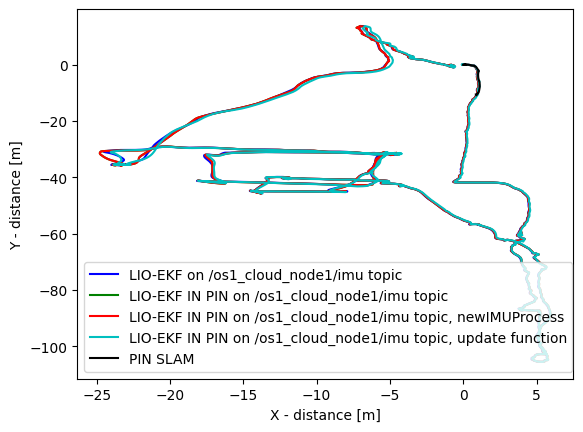

In [5]:
plt.plot(LIOEKF_os1_cloud_node1_imu[0], LIOEKF_os1_cloud_node1_imu[1], label='LIO-EKF on /os1_cloud_node1/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu[0], LIOEKF_IN_PIN_os1_cloud_node1_imu[1], label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic', color='g') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess[0], LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess[1], 
         label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic, newIMUProcess', color='r') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu_update[0], LIOEKF_IN_PIN_os1_cloud_node1_imu_update[1], 
         label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic, update function', color='c') 
# plt.plot(pin_odom[0], pin_odom[1], label='PIN odometry', color='m') 
plt.plot(pin_slam[0], pin_slam[1], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (16, 16)

plt.xlabel('X - distance [m]')
plt.ylabel('Y - distance [m]')
plt.show()

# PLOT HEIGHT

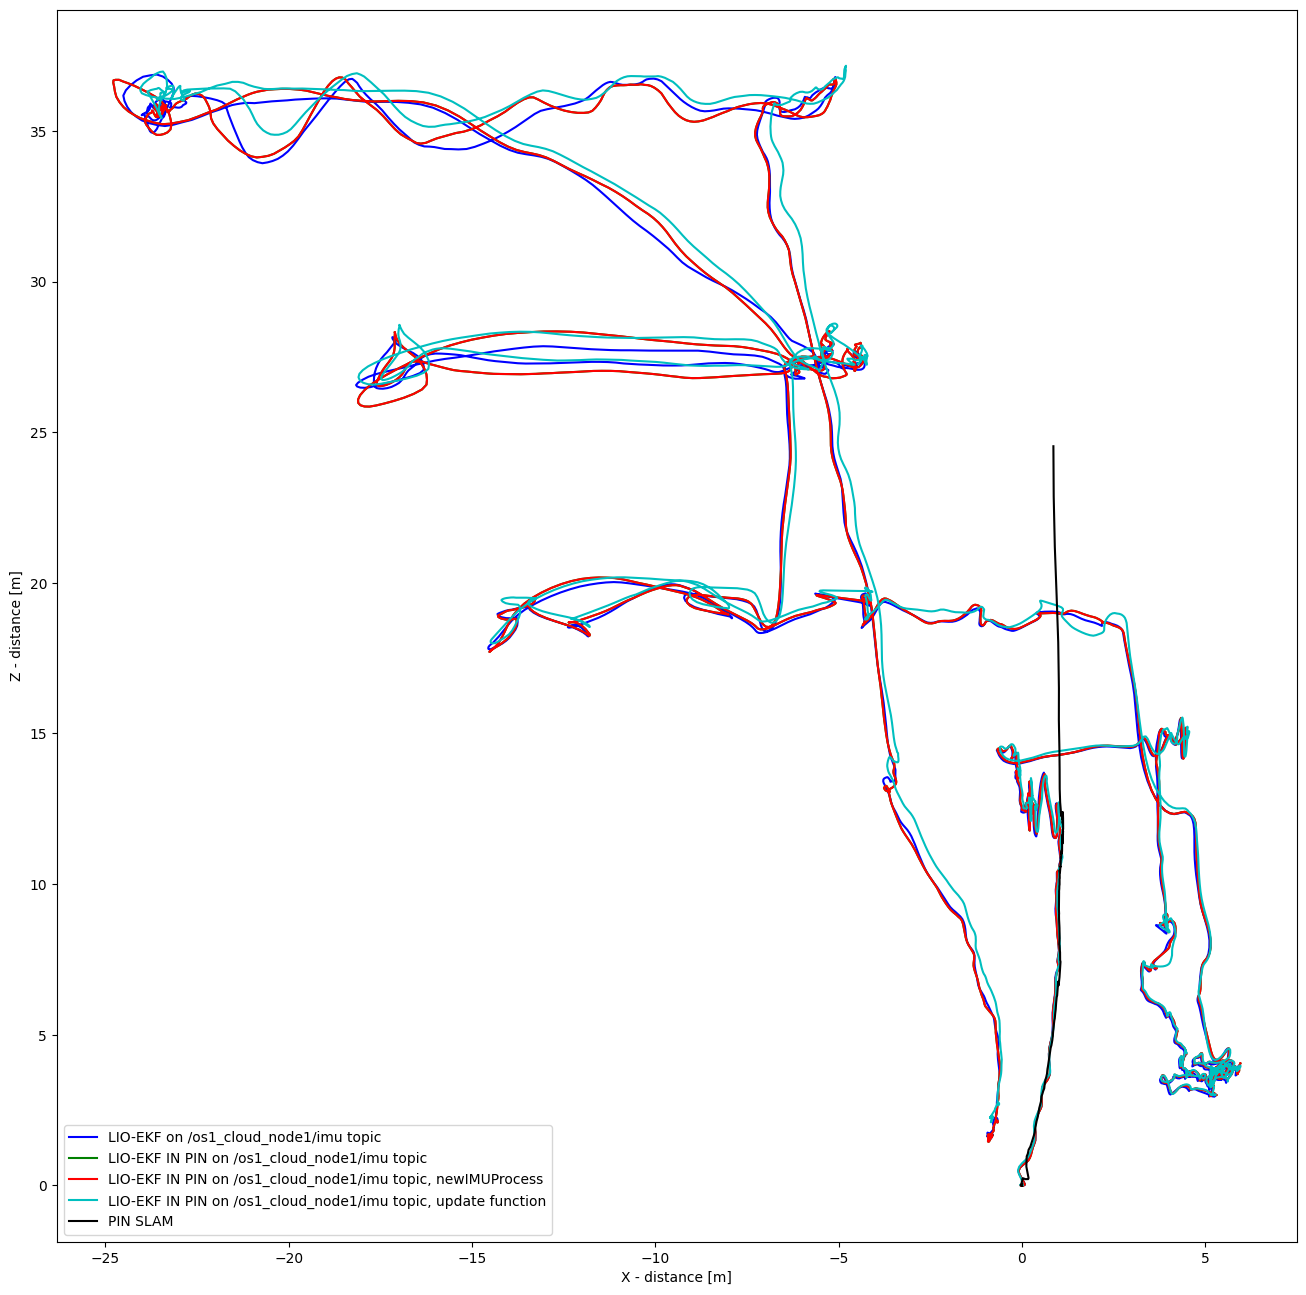

In [6]:
plt.plot(LIOEKF_os1_cloud_node1_imu[0], LIOEKF_os1_cloud_node1_imu[2], label='LIO-EKF on /os1_cloud_node1/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu[0], LIOEKF_IN_PIN_os1_cloud_node1_imu[2], label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic', color='g') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess[0], LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess[2]
         , label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic, newIMUProcess', color='r') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu_update[0], LIOEKF_IN_PIN_os1_cloud_node1_imu_update[2]
         , label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic, update function', color='c') 
# plt.plot(pin_odom[0], pin_odom[2], label='PIN odometry', color='m')
plt.plot(pin_slam[0], pin_slam[2], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (16, 16)

plt.xlabel('X - distance [m]')
plt.ylabel('Z - distance [m]')
plt.show()

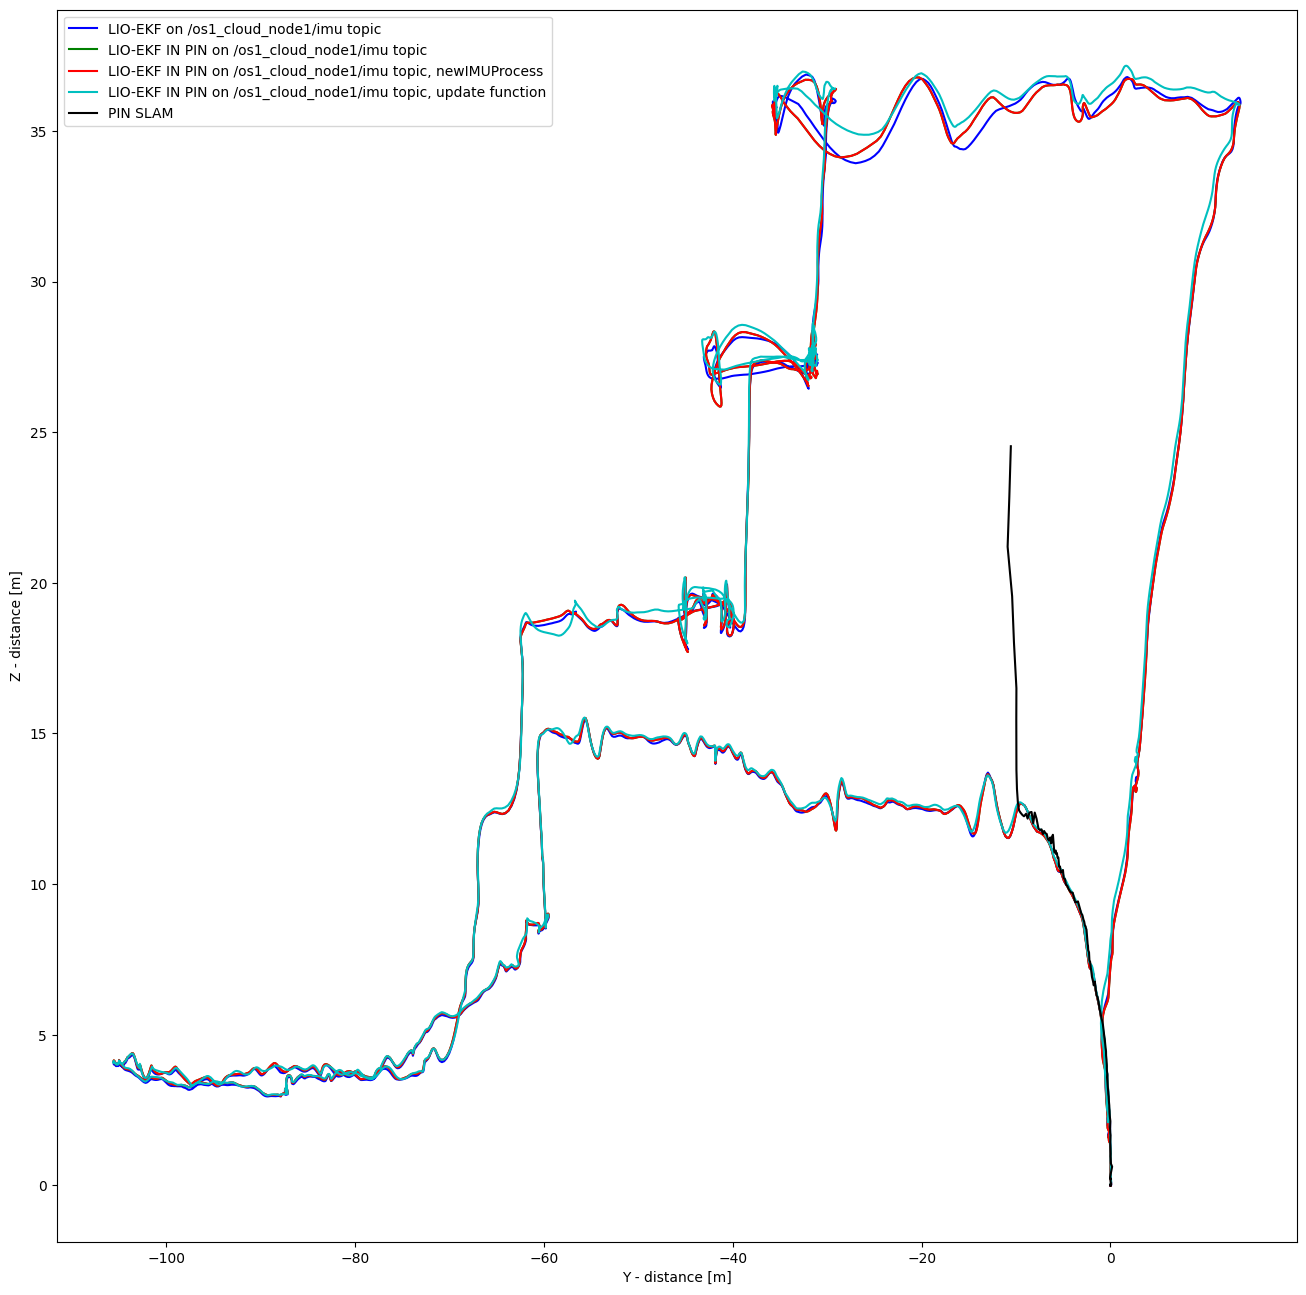

In [7]:
plt.plot(LIOEKF_os1_cloud_node1_imu[1], LIOEKF_os1_cloud_node1_imu[2], label='LIO-EKF on /os1_cloud_node1/imu topic', color='b') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu[1], LIOEKF_IN_PIN_os1_cloud_node1_imu[2], label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic', color='g') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess[1], LIOEKF_IN_PIN_os1_cloud_node1_imu_newIMUProcess[2]
         , label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic, newIMUProcess', color='r') 
plt.plot(LIOEKF_IN_PIN_os1_cloud_node1_imu_update[1], LIOEKF_IN_PIN_os1_cloud_node1_imu_update[2]
         , label='LIO-EKF IN PIN on /os1_cloud_node1/imu topic, update function', color='c') 
# plt.plot(pin_odom[1], pin_odom[2], label='PIN odometry', color='m')
plt.plot(pin_slam[1], pin_slam[2], label='PIN SLAM', color='k') 

plt.legend()
plt.rcParams["figure.figsize"] = (16, 16)

plt.xlabel('Y - distance [m]')
plt.ylabel('Z - distance [m]')
plt.show()